In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

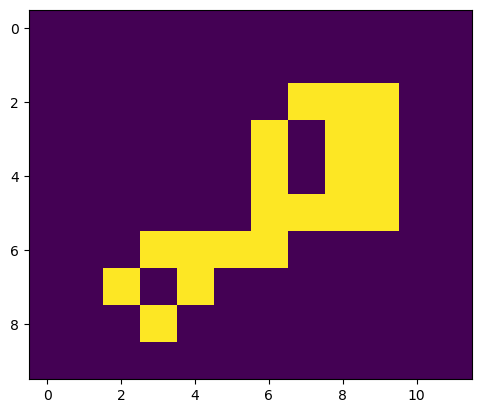

In [2]:
kernel = np.ones((3, 3), np.uint8)
img = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], np.uint8)

plt.imshow(img)

In [3]:
def dilate(img, kernel):
    rows, cols = img.shape
    krows, kcols = kernel.shape
    print(krows, kcols)
    pad_rows = krows // 2
    pad_cols = kcols // 2
    
    padded_img = cv.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv.BORDER_CONSTANT)
    
    output = np.zeros_like(img)
    
    for i in range (rows):
        for j in range (cols):
            
            roi = padded_img[i:i + krows, j:j + kcols]
            
            result = np.zeros_like(roi)
            h, w = result.shape

            for x in range (h):
                for y in range (w):
                    result[x, y] = roi[x, y] & kernel[x, y]
            
            if np.any(result):
                output[i][j] = 1
    
    return output

3 3


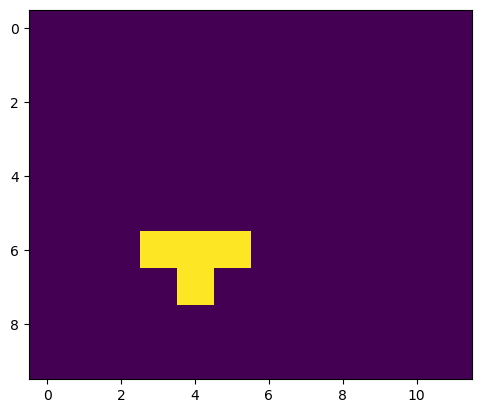

3 3


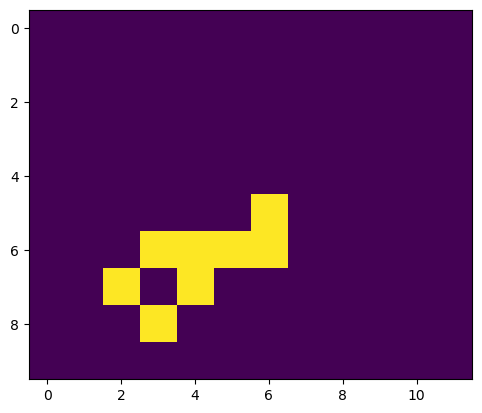

3 3


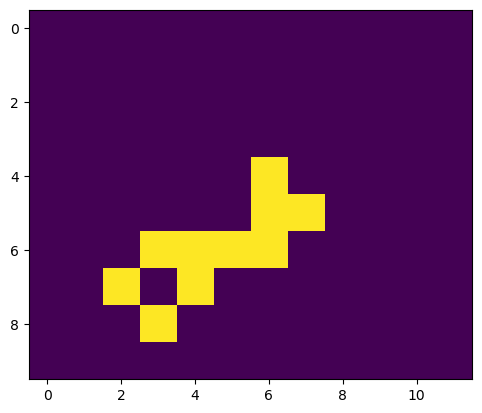

3 3


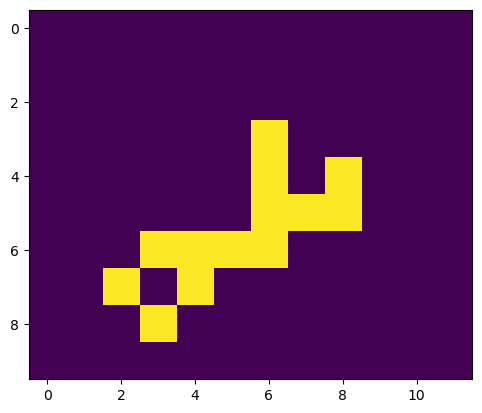

3 3


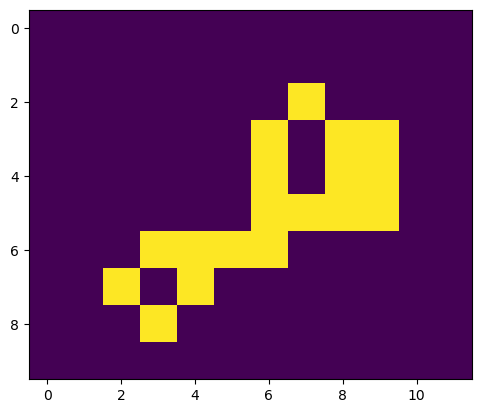

3 3


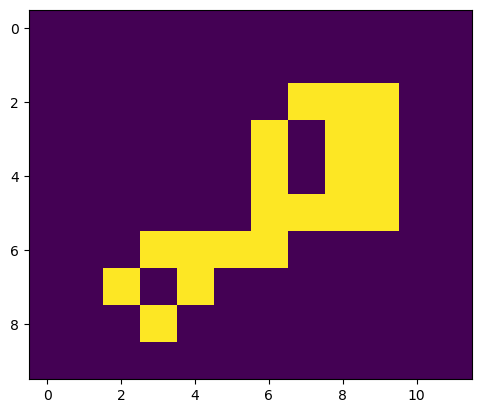

3 3


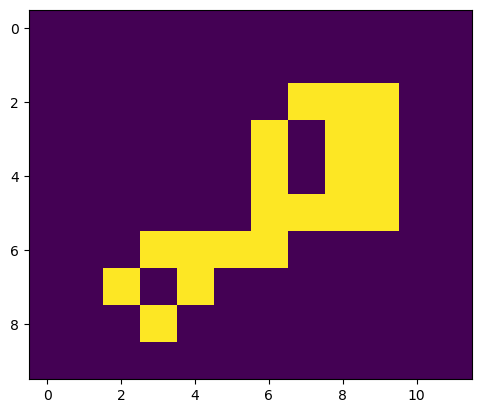

In [4]:
fill = np.zeros_like(img)
fill[6, 4] = 1 # seed co-ordinate

while True:
    prev = fill
    output = dilate(fill, kernel)
    fill = np.bitwise_and(output, img)
    plt.imshow(fill)
    plt.show()
    if np.array_equal(fill, prev):
        break